In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Vector Geometry Code

In [2]:
import math
import numpy as np

## Vector3 class

Vector class that represents a point in $\mathbb{R}^3$.

In [3]:
class Vec3():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
    def __repr__(self):
        return "[%i, %i, %i]" % (self.x, self.y, self.z)
    
    def __add__(self, v):
        return Vec3(self.x + v.x, self.y + v.y, self.z + v.z)
    
    def __sub__(self, v):
        return Vec3(self.x - v.x, self.y - v.y, self.z - v.z)
    
    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)
    
    def dot(self, v):
        return self.x * v.x + self.y * v.y + self.z * v.z
    
    def length(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def normal(self):
        v = Vec3(0, self.z, -self.y)
        if self.dot(v) == 0:
            return v
        
        v = Vec3(self.z, 0, -self.x)
        if self.dot(v) == 0:
            return v
        
        v = Vec(self.y, -self.x, 0)
        if self.dot(v) == 0:
            return v
        
        raise ValueError('Failed to get normal vector.')

In [4]:
v = Vec3(1,1,1)

In [5]:
v

[1, 1, 1]

### Addition & subtraction

In [6]:
v = Vec3(1,1,1)
u = Vec3(2,3,4)
w = u - v
w

[1, 2, 3]

### Length

To get the length of a vector we calculate: 

$$\| \vec{v} \| = \sqrt{v_1^2+v_2^2+v_3^2}$$

In [7]:
v.length()

1.7320508075688772

Testing this with a Pythagorean triplet.

In [8]:
triplet = Vec3(3,4,0)
triplet.length() == 5

True

In [9]:
triplet = Vec3(0,4,3)
triplet.length() == 5

True

### Dot-product

To calculate the dot product between two vectors we calculate: 

$$\vec{v}\cdot\vec{u}=\begin{bmatrix}v_1\\v_2\\v_3\end{bmatrix}\cdot\begin{bmatrix}u_1\\u_2\\u_3\end{bmatrix}=v_1\cdot u_1+v_2 \cdot u_2+v_3 \cdot u_3$$

In [10]:
v.dot(u)

9

### Normal vector

To find a normal vector for $\vec{v}$ we want a vector such that the dot-product $\vec{v}\cdot\vec{u}=0$.

In [11]:
vn = v.normal()

In [12]:
vn

[0, 1, -1]

In [13]:
v.dot(vn)

0

## Lines

We can define a line in $\mathbb{R}^3$ with two vectors. The first vector is the _base_ vector and the second one is the _direction_.

In [14]:
class Line():
    def __init__(self, v, u):
        self.base = v
        self.direction = u - v
    
    def __repr__(self):
        return "[%i, %i, %i] + k*[%i, %i, %i]" % (self.base.x,      self.base.y,      self.base.z, 
                                                  self.direction.x, self.direction.y, self.direction.z)
    
    def length(self):
        return self.direction.length()
    
    def normal(self):
        return self.direction.normal()
    
    def toSeries(self, min, max, points):
        linspace = np.linspace(min, max, points)
        xyz = []
        for i in range(0, len(linspace)-1):
            xyz.append(self.direction.scale(linspace[i])+self.base)
        return xyz

In [15]:
l = Line(v, u)
l

[1, 1, 1] + k*[1, 2, 3]

In [16]:
l.length()

3.7416573867739413

In [17]:
ln = l.normal()

In [18]:
l.direction.dot(ln)

0

### Intersecting lines

When we have two lines in $\mathbb{R}^3$ we can have three scenario's:

1. The lines are equal.
2. The lines are crossing/parallel.
3. The lines intersect.

In [19]:
def intersect_line(l1, l2):
    # Check if they are the same.
    # Check if the are crossing/parallel lines.
    # Find the intersection and return the point.
    return Nothing

## Planes

Similar to a line, we now have a second direction vector.

In [20]:
class Plane():
    def __init__(self, v: Vec3, u: Vec3, w: Vec3):
        self.v = v
        self.u = u
        self.w = w
        
    def __repr__(self):
        return "[%i, %i, %i] + k*[%i, %i, %i] + j*[%i, %i, %i]" % (self.v.x, self.v.y, self.v.z,
                                                                   self.u.x, self.u.y, self.u.z,
                                                                   self.w.x, self.w.y, self.w.z)
    
    def toSeries(self, min, max, points):
        linspace = np.linspace(min, max, points)
        xyz = []
        for k in range(0, len(linspace)-1):
            for j in range(0, len(linspace)-1):
                xyz.append(v + u.scale(linspace[k]) + w.scale(linspace[j]))
        return xyz

In [21]:
p = Plane(Vec3(0,0,0), Vec3(1,0,0), Vec3(-1,1,0))

In [22]:
p

[0, 0, 0] + k*[1, 0, 0] + j*[-1, 1, 0]

## Plotting

### Two lines

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
def plot3D(lines=[], points=[], planes=[]):
    min = -10
    max = 10
    spacing = 25
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')
    for line in lines:
        x,y,z = zip(*[[v.x, v.y, v.z] for v in line.toSeries(min, max, spacing)])
        ax.plot(x,y,z)
    if type(points) is not int and len(points) > 0:
        x,y,z = zip(*[[v.x, v.y, v.z] for v in points])
        ax.scatter(x,y,z)
    for plane in planes:
        x,y,z = zip(*[[v.x, v.y, v.z] for v in plane.toSeries(min, max, spacing)])
        ax.plot_trisurf(x,y,z)
    ax.grid()

In [25]:
l1 = Line(Vec3(0,0,0), Vec3(1,1,1))
l1

[0, 0, 0] + k*[1, 1, 1]

In [26]:
l2  = Line(Vec3(0,0,0), Vec3(-1,1,1))
l2

[0, 0, 0] + k*[-1, 1, 1]

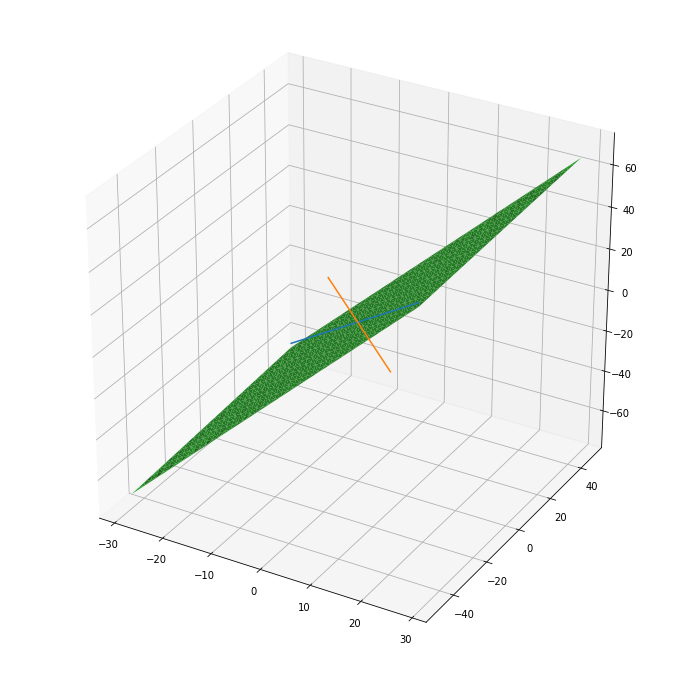

In [27]:
plot3D([l1, l2], [Vec3(1,1,1)], [p])

In [28]:
a = np.array([1,2,3])
b = np.array([2,3,4])

In [29]:
a

array([1, 2, 3])

In [30]:
b

array([2, 3, 4])

In [31]:
np.vdot(a,b)

20

In [32]:
np.linalg.solve([[1,2],[4,5]], [3,4])

array([-2.33333333,  2.66666667])

## Solving systems of equations

In [64]:
a = np.array([[1,3,2], [1,2,0]])
b = np.array([9, 8])

In [66]:
np.linalg.lstsq(a, b)

(array([ 1.80952381,  3.0952381 , -1.04761905]),
 array([], dtype=float64),
 2,
 array([ 4.22157062,  1.0855144 ]))